In [1]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, accuracy_score, precision_score, f1_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

np.random.seed(42)

import time
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Group 2:

Names of Group members: Chukwuma Frank Chukwuemeka; Mutthu Annamalai; Supratim Basu.

In [7]:
EnergyData = pd.read_csv('energydata_complete.csv')

In [8]:
#Data Preprocessing
def myPreProc(EnergyData):
    procData = EnergyData.dropna(how = 'all', axis = 1, inplace = False)
    procData = procData.dropna() 
    procData['Power'] = procData['Appliances'].astype(int) + procData['lights'].astype(int)
    procData = procData.drop('Appliances', axis = 1);
    procData = procData.drop('lights', axis = 1);
    procData = procData.drop('date', axis = 1);
    procData = procData.drop(['rv1', 'rv2'],axis=1)
    return procData

In [9]:
procData = myPreProc(EnergyData)

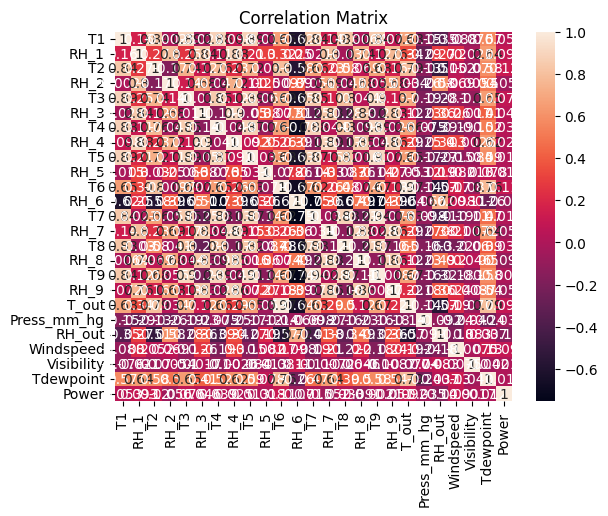

In [19]:
# Plot a correlation matrix
corr = procData.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [11]:
X = procData.drop('Power', axis=1)
y = procData['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#Standardizing the input features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

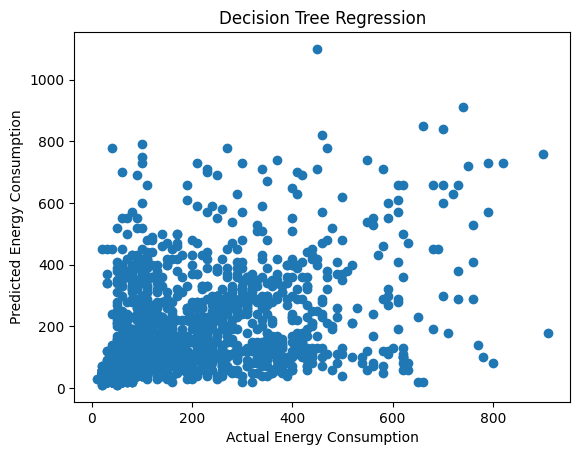

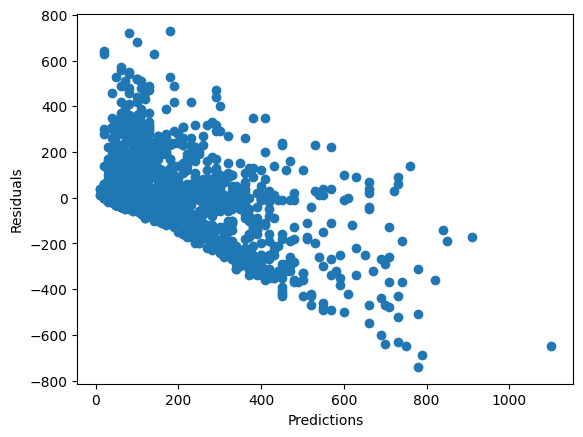

MSE: 8102.43
RMSE: 90.01
MAE: 38.32
Test R2 score is: 0.24
Execution time is: 586.67


In [13]:
# Define the decision tree regression model
Decision_model = DecisionTreeRegressor(random_state=42)

# Fit the model with the training set
start_time1 = time.time()
Decision_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = Decision_model.predict(X_test_scaled)
end_time1 = time.time()
execution_time = (end_time1 - start_time1) * 1000

# Evaluate the performance of the model using mean squared error and R-squared

r_2 = r2_score(y_test, y_pred_dt)
mse2 = mean_squared_error(y_test, y_pred_dt)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_test, y_pred_dt)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Decision Tree Regression')
plt.show()

# Plot the residuals
plt.scatter(y_pred_dt, y_test - y_pred_dt)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE: {:.2f}" .format(mse2))
print("RMSE: {:.2f}" .format(rmse2))
print("MAE: {:.2f}" .format(mae2))
print('Test R2 score is: {:.2f}' .format(r_2))
print('Execution time is: {:.2f}' .format(execution_time))

Since the metrics are not looking good. Let us obtain the feature importance and see if we can improve by eliminating some features that have little or no influence on the model

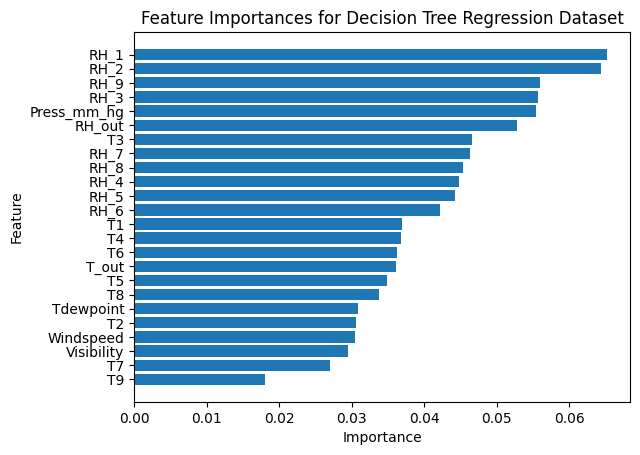

In [14]:
# obtain the feature importances
importances = Decision_model.feature_importances_

# create a dictionary to store feature names and importances
feature_importances = {}
for i in range(len(X_train.columns)):
    feature_importances[X_train.columns[i]] = importances[i]

# sort the dictionary in descending order by importance
feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1]))

# plot the feature importances as a horizontal bar plot
plt.barh(range(len(feature_importances)), list(feature_importances.values()), align='center')
plt.yticks(range(len(feature_importances)), list(feature_importances.keys()))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title("Feature Importances for Decision Tree Regression Dataset")
plt.show()



In [15]:
#Dropping some features that are of lower importance to our model and watch for improvement
DT_procData = procData.drop(['T9', 'T7', 'Visibility'],axis=1)

X3 = DT_procData.drop('Power', axis=1)
y3 = DT_procData['Power']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

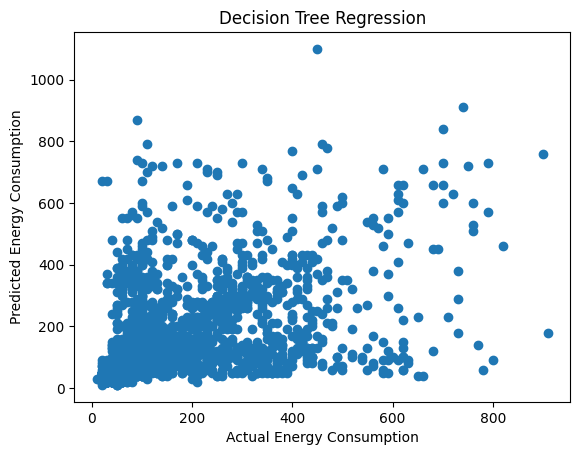

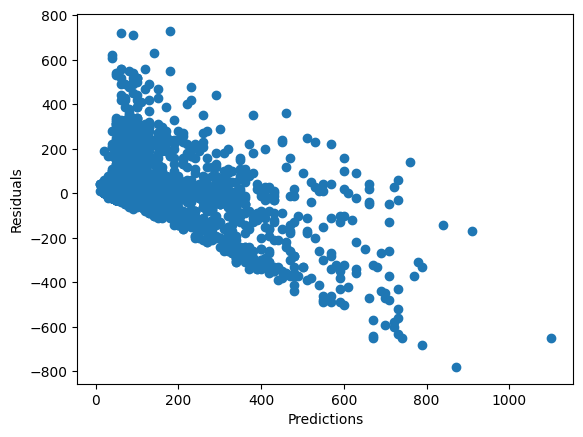

MSE: 8495.36
RMSE: 92.17
MAE: 38.78
Test R2 score is: 0.20
Execution time is: 1110.70


In [16]:
#Standardizing the input features
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

# Define the decision tree regression model
Decision_model = DecisionTreeRegressor(random_state=42)

# Fit the model with the training set
start3_time1 = time.time()
Decision_model.fit(X3_train_scaled, y3_train)

# Make predictions on the test set
y3_pred_dt = Decision_model.predict(X3_test_scaled)
end3_time1 = time.time()
execution3_time = (end3_time1 - start3_time1) * 1000

# Evaluate the performance of the model using mean squared error and R-squared

r7_2 = r2_score(y3_test, y3_pred_dt)
mse7 = mean_squared_error(y3_test, y3_pred_dt)
rmse7 = np.sqrt(mse7)
mae7 = mean_absolute_error(y3_test, y3_pred_dt)

# Plot the predicted values vs. the true values
plt.scatter(y3_test, y3_pred_dt)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Decision Tree Regression')
plt.show()

# Plot the residuals
plt.scatter(y3_pred_dt, y3_test - y3_pred_dt)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE: {:.2f}" .format(mse7))
print("RMSE: {:.2f}" .format(rmse7))
print("MAE: {:.2f}" .format(mae7))
print('Test R2 score is: {:.2f}' .format(r7_2))
print('Execution time is: {:.2f}' .format(execution3_time))

It is obvious that the feature importance tuning we have employed to improve our model did not end well as the original model oerformance was better. Hence , we will opt to use GridSearchCV to see we can have a better performance.

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.13607530443852006


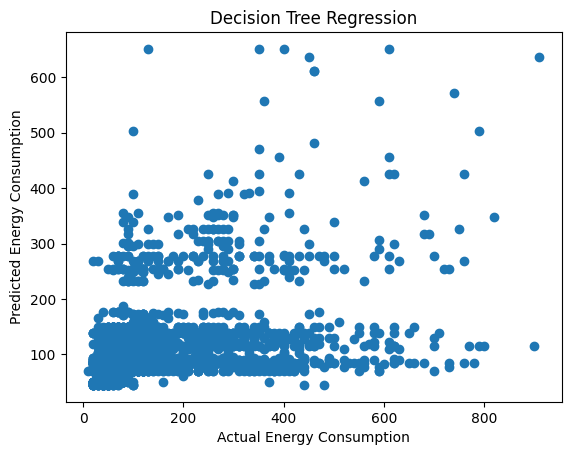

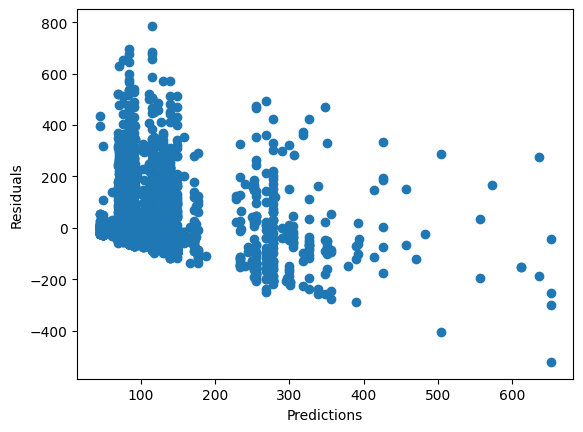

MSE: 8617.78
RMSE: 92.83
MAE: 52.30
Test R2 score is: 0.19
Execution time is: 78100.79


In [17]:
# Define the decision tree regression model
Decision_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid_dt = {'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(Decision_model, param_grid_dt, cv=5)

# Fit the model with the training set
start6_time1 = time.time()
grid_search_dt.fit(X_train_scaled, y_train)
end6_time1 = time.time()
execution6_time = (end6_time1 - start6_time1) * 1000

# Make predictions on the test set
y_pred_dt = grid_search_dt.predict(X_test_scaled)

# Evaluate the performance of the model using mean squared error and R-squared
r6_2 = r2_score(y_test, y_pred_dt)
mse6 = mean_squared_error(y_test, y_pred_dt)
rmse6 = np.sqrt(mse6)
mae6 = mean_absolute_error(y_test, y_pred_dt)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search_dt.best_params_)
print("Best score:", grid_search_dt.best_score_)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Decision Tree Regression')
plt.show()

# Plot the residuals
plt.scatter(y_pred_dt, y_test - y_pred_dt)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE: {:.2f}" .format(mse6))
print("RMSE: {:.2f}" .format(rmse6))
print("MAE: {:.2f}" .format(mae6))
print('Test R2 score is: {:.2f}' .format(r6_2))
print('Execution time is: {:.2f}' .format(execution6_time))

The Gridsearch hyperparameter tuning did not improve it eith instaed we can see a further decrease in performance of the model as compared to the orignal metric values. We will extend this fruther by using a RandomizedSearchCV.

Best hyperparameters: {'min_samples_split': 6, 'min_samples_leaf': 9, 'max_depth': None}
Best score: 0.2551775374861209


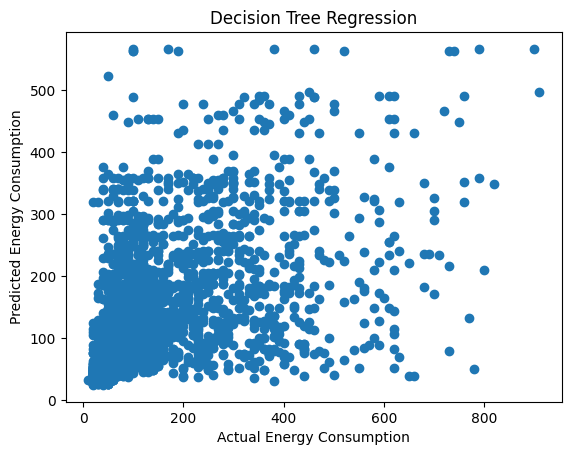

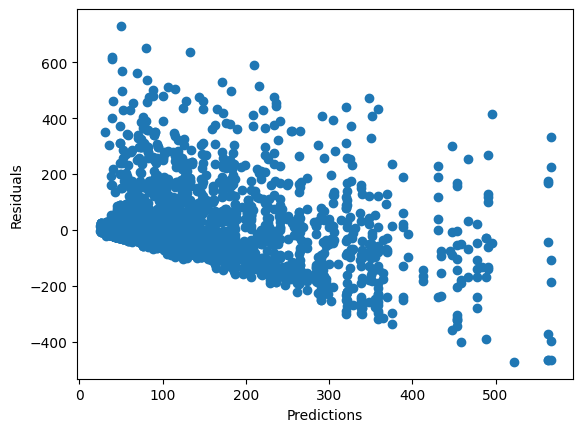

MSE: 7100.81
RMSE: 84.27
MAE: 40.90
Test R2 score is: 0.34
Execution time is: 82289.59


In [18]:
# Define the decision tree regression model
Decision_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters to tune
param_dist_dt4 = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create the RandomizedSearchCV object
random_search_dt4 = RandomizedSearchCV(Decision_model, param_distributions=param_dist_dt4, n_iter=100, cv=5, random_state=42)

# Fit the model with the training set
start6_time4 = time.time()
random_search_dt4.fit(X_train_scaled, y_train)
end6_time4 = time.time()
execution6_time4 = (end6_time4 - start6_time4) * 1000

# Make predictions on the test set
y_pred_dt4 = random_search_dt4.predict(X_test_scaled)

# Evaluate the performance of the model using mean squared error and R-squared
r6_2_4 = r2_score(y_test, y_pred_dt4)
mse6_4 = mean_squared_error(y_test, y_pred_dt4)
rmse6_4 = np.sqrt(mse6_4)
mae6_4 = mean_absolute_error(y_test, y_pred_dt4)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search_dt4.best_params_)
print("Best score:", random_search_dt4.best_score_)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_dt4)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('Decision Tree Regression')
plt.show()

# Plot the residuals
plt.scatter(y_pred_dt4, y_test - y_pred_dt4)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE: {:.2f}" .format(mse6_4))
print("RMSE: {:.2f}" .format(rmse6_4))
print("MAE: {:.2f}" .format(mae6_4))
print('Test R2 score is: {:.2f}' .format(r6_2_4))
print('Execution time is: {:.2f}' .format(execution6_time4))

The Gridsearch hyperparameter tuning did improve the model perforemance as can be seen from the values of the metrics. The error metrics, MSE, RMSE, MAE, were significantly reduced and the R2 score increased as well.